In [2]:
import pandas as pd
from pathlib import Path
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sys.path.append('../..')

In [4]:
import src.utils as utils
import PIL

In [5]:
root = Path('/hpc/group/kamaleswaranlab/EmoryDataset/Images/chest_xrays')

YEARS = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
image_dir = "extracted-images"
metadata = "metadata_with_supertables_filtered_notes_filtered_with_img_paths.csv"
notes = "all_notes.csv"

In [6]:
metadatadf = pd.read_csv(root / metadata)
notesdf = pd.read_csv(root / notes)
#metadatadf['img_paths'] = metadatadf.apply(lambda x: utils.acc_to_path(root,x['year'], image_dir, x['AccessionNumber'], x['SeriesNumber']), axis = 1)
#metadatadf.to_csv(root / "metadata_with_supertables_filtered_notes_filtered_with_img_paths.csv")

/tmp/ipykernel_3752349/2472823040.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  metadatadf = pd.read_csv(root / metadata)
/tmp/ipykernel_3752349/2472823040.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  notesdf = pd.read_csv(root / notes)


In [7]:
metadf = metadatadf.loc[metadatadf.SeriesNumber == 1]

In [8]:
empi_nbrs = metadf['EMPI_NBR'].unique()
empi_nbrs

array(['da75ddb523faf9957500fdcd357ea98332caf28a43159377b1168a65483252a6',
       'ec1ecd944ea8abe1cdd62476a5516a25eae2685e603c026482806efe2694ccb9',
       '72b19f80dce7cbe09c2bac3016a5229dfee002016ceb4812003faae5f6509093',
       ...,
       'a59386af012ced0f1a48008bc2375f3fda628045a0aa85766197c730fe24bccc',
       '539c073043cd38786533b5f5022b6b6a7a0d8416b846b828213bb64fe777de9c',
       'efb14f0a3ed472c4d2c1a8a553987562dfd494ea9ac59fb7c2ae2c6547a80e47'],
      dtype=object)

In [9]:
## 6 - deteriorate and death
## 10 - improve

In [10]:
selected = metadf.loc[metadf['EMPI_NBR'] == empi_nbrs[10]]
selected = selected.sort_values(by = 'StudyDate')
print(len(selected))

3


In [20]:
selected = metadatadf.loc[metadatadf['AccessionNumber'] == 'd234277c90acb244e8bd4c72d097372896f15f8325f1765a3e50695d6f07f0e1']

In [21]:
selected

,Unnamed: 0,EMPI_NBR,ENCOUNTER_NBR,BED_LOCATION_START,BED_LOCATION_END,StudyDate,PatientID,StudyDescription,SeriesNumber,SeriesDescription,...,AccessionNumber,BodyPartExamined,Modality,WindowCenter,WindowWidth,RelativeXRayExposure,supertable_path,year,PatientID.1,img_paths
13,13,72b19f80dce7cbe09c2bac3016a5229dfee002016ceb48...,23495c7c5186e8892e5eb034a051f3c7ec30903132560e...,2015-04-27 05:30:00,2015-05-10 14:23:25,2015-04-30,72b19f80dce7cbe09c2bac3016a5229dfee002016ceb48...,XR CHEST 1 VIEW PORTABLE,2,AP,...,d234277c90acb244e8bd4c72d097372896f15f8325f176...,PORT CHEST,CR,2048.0,4096.0,1791.0,/labs/kamaleswaranlab/niffler-data/chest_xrays...,2015,NaN,/hpc/group/kamaleswaranlab/EmoryDataset/Images...
18,18,72b19f80dce7cbe09c2bac3016a5229dfee002016ceb48...,23495c7c5186e8892e5eb034a051f3c7ec30903132560e...,2015-04-27 05:30:00,2015-05-10 14:23:25,2015-04-30,72b19f80dce7cbe09c2bac3016a5229dfee002016ceb48...,XR CHEST 1 VIEW PORTABLE,5,AP,...,d234277c90acb244e8bd4c72d097372896f15f8325f176...,PORT CHEST,CR,2048.0,4096.0,1747.0,/labs/kamaleswaranlab/niffler-data/chest_xrays...,2015,NaN,/hpc/group/kamaleswaranlab/EmoryDataset/Images...


In [15]:
selected

,Unnamed: 0,EMPI_NBR,ENCOUNTER_NBR,BED_LOCATION_START,BED_LOCATION_END,StudyDate,PatientID,StudyDescription,SeriesNumber,SeriesDescription,...,AccessionNumber,BodyPartExamined,Modality,WindowCenter,WindowWidth,RelativeXRayExposure,supertable_path,year,PatientID.1,img_paths


In [100]:
Path(selected.iloc[i]['img_paths']).stem

'dcaca8d1693ce7cfeb57766eafdf799e00ced254194050eec4d3a461ea6cf666_1'

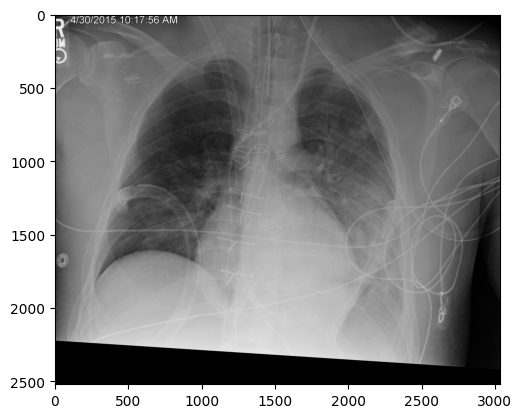

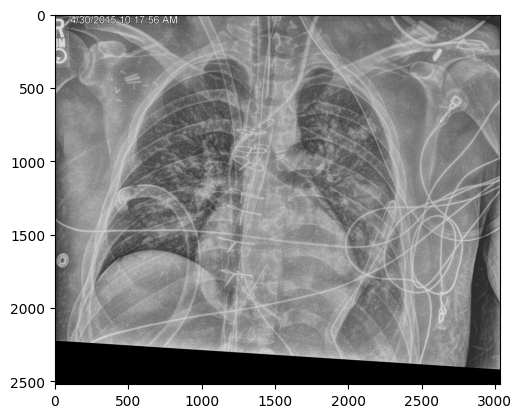

In [23]:
images= []
for i in range(len(selected)):
    img = PIL.Image.open(selected.iloc[i]['img_paths'])
    plt.imshow(img, cmap = 'grey')
    plt.show()
    images.append(img)

In [45]:
notes = []
for i in range(len(selected)):
    acc_nbr = selected.iloc[i]['AccessionNumber']
    notes.append(notesdf.loc[notesdf.ACC_NBR == acc_nbr]['DOC_TEXT'].values[0])
    print(notes[-1])

XR Chest 1 View Portable

CLINICAL INDICATION: Abnormal finding on lung imaging;. 

COMPARISON: Most recent prior

FINDINGS/
IMPRESSION:  ET tube tip is at an appropriate level above the carina. Tip of
right IJ approach PA catheter is in the right main pulmonary artery. Mediastinal
drains and chest tubes are in place. No pneumothorax. Tip of right IJ central
catheter is in the SVC. The patient is status post CABG.  Sternal wires are
nondisplaced.  Embolized catheter fragment projects over a left lower lobe
pulmonary artery. Interval enlargement of the cardiomediastinal silhouette,
likely representing postsurgical changes.

XR Chest 1 View Portable

CLINICAL INDICATION: Abnormal finding on lung imaging;.  

COMPARISON STUDY: Most recent prior chest radiograph. 


FINDINGS/IMPRESSION:

1. Stable, embolized catheter fragment projecting over the left lower lobe
pulmonary artery. Other support apparatus in adequate positioning. No
pneumothorax.

2. No acute airspace process.

XR Chest 1 Vie

In [19]:
notesdf.

['REPORT\r\rXR Chest 1 View Portable\n\nCLINICAL INDICATION: Tube Placement.;Other  \n\nCOMPARISON STUDY: Most recent prior chest radiograph. \n\n\nFINDINGS/IMPRESSION:\n\n1. Interval placement of an ET tube above the carina and NG tube with the side\nport near the GE junction, recommend advancement. Stable right-sided approach\nPICC. No pneumothorax.\n\n2. Hypoinflated lungs with bibasilar atelectasis.\n',
 'REPORT\r\rXR Chest 1 View Portable\n\nCLINICAL INDICATION: Other;Tube placement. \n\nCOMPARISON: 5/1/2015\n\nFINDINGS/\nIMPRESSION:  Support apparatus stable. No pneumothorax identified.  Bilateral\npleural effusions with superimposed edema/pneumonia, unchanged.\n',
 'REPORT\r\rXR Chest 1 View Portable\n\nCLINICAL INDICATION: Respiratory failure;. \n\nCOMPARISON: Yesterday at 07:50\n\nFINDINGS/\nIMPRESSION:  There is no significant change in the bibasilar opacities. Support\napparatus is in adequate position.\n',
 'REPORT\r\rXR Chest 1 View Portable\n\nCLINICAL INDICATION: Other;E

### Diffusion Model

In [51]:
from diffusers import StableDiffusionPipeline
import torch

torch.cuda.empty_cache()
os.environ["PYTORCH_CUDA_ALLOC_CONF"]="expandable_segments:True"
os.environ["HF_HOME"] = "/hpc/dctrl/ma618"

In [10]:
model_path = "/hpc/group/kamaleswaranlab/cxrgen/roentgen/roentgen"
device='cuda'  # or mps, cpu...

pipe = StableDiffusionPipeline.from_pretrained(model_path).to(torch.float32).to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]/hpc/dctrl/ma618/torch/lib64/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...:  29%|██▊       | 2/7 [00:00<00:01,  3.10it/s]An error occurred while trying to fetch /hpc/group/kamaleswaranlab/cxrgen/roentgen/roentgen/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /hpc/group/kamaleswaranlab/cxrgen/roentgen/roentgen/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...:  43%|████▎     | 3/7 [00:00<00:01,  3.68it/s]An error occurred while trying to fetch /hpc/group/kamaleswaranlab/cxrgen/roentgen/roentgen/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /hpc/group/

In [12]:
prompt = "bilateral airspace opacities"
print(prompt)

output = pipe([prompt], num_inference_steps=70, height=512, width=512, guidance_scale=4)

bilateral airspace opacities


100%|██████████| 70/70 [00:14<00:00,  4.68it/s]


In [26]:
img = np.array(output[0][0])
img.shape

(512, 512, 3)

In [38]:
inputs = processor(images = img, return_tensors = 'pt')
print(inputs['pixel_values'].shape, inputs.keys())
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.pooler_output

torch.Size([1, 3, 224, 224]) dict_keys(['pixel_values'])


In [41]:
prompt = ["an image of a chest x-ray scan showing the lungs", "a chest x-ray scan ", "a chest x-ray scan with cloudy patterns on both lung", "an image of a chest x-ray scan with bilateral airspace opacities", "bladluiihuef esuifhal  fesaf", "a photograph of an astronaut riding a horse"]

text_input = tokenizer(
    prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
).to('cuda')

with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to('cuda'))

In [42]:
image_embeddings = embeddings.cuda()
print(image_embeddings.shape)
text_embeddings = text_embeddings.pooler_output

image_embeddings = F.normalize(image_embeddings, dim=-1)
text_embeddings = F.normalize(text_embeddings, dim=-1)

similarity = torch.matmul(image_embeddings, text_embeddings.T)
print(similarity)

torch.Size([1, 768])
tensor([[-0.0300,  0.0130, -0.0062, -0.0165,  0.0519]], device='cuda:0')


### BioCLIP

In [47]:
os.environ["PYTORCH_CUDA_ALLOC_CONF"]="expandable_segments:True"
os.environ["HF_HOME"] = "/hpc/dctrl/ma618"

In [48]:
from urllib.request import urlopen
from PIL import Image
from open_clip import create_model_from_pretrained, get_tokenizer

# Load the model and config files from the Hugging Face Hub
model, preprocess = create_model_from_pretrained('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')
tokenizer = get_tokenizer('hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224')

/hpc/dctrl/ma618/torch/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
model.cuda()

CustomTextCLIP(
  (visual): TimmModel(
    (trunk): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=768, out_features=768, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=768

In [56]:
images[0]

array([[  2,   2,   2, ..., 199, 200, 202],
       [  2,   2,   2, ..., 199, 199, 201],
       [  2,   2,   2, ..., 199, 200, 200],
       ...,
       [134, 134, 133, ..., 187, 188, 187],
       [132, 133, 133, ..., 188, 189, 186],
       [134, 132, 134, ..., 189, 187, 187]], dtype=uint8)

In [58]:
inputimg = torch.stack([preprocess(img) for img in images]).cuda()
print(inputimg.shape)

torch.Size([3, 3, 224, 224])


In [81]:
#prompt = ["an image of a chest x-ray with bilateral airspace opacities", "an image of a chest xray with left pleural effusion", "an image of a chest xray with cardiomegaly", "an image of chest xray with no pneumothorax, but an edema-like pattern and moderate cardiomegaly", "an image of a chest xray showing no abnormalities",  "an image of a monkey playing a violin", "an image of a patient's chest", "a medical image used for clinical diagnosis",
#          "Increasing small/moderate layering right pleural effusion. Slight decrease in\nbilateral interstitial opacities most likely representing pulmonary edema. Increasing layering left pleural effusion with adjacent passive atelectasis causing leftward to chronic opacification obscuring the left aspect of the diaphragm. Stable enlarged cardiac silhouette status post valve replacement."]

template = "an image of a chest x-ray scan showing "
prompts = ["bilateral airspace opacities", "no acute airspace opacities", "an unclear image", "equivocal findings", 
          "consolidation in the left lung", "consolidation in the right lung", "bibasilar atelectasis", "low lung volumes",
           "opacities in the left lung", "opacities in the right lung", "No focal consolidation, pleural effusion or pneumothorax.", "Interval enlargement of the cardiomediastinal silhouette"]
prompts= [template + x for x in prompts]
context_length = 256
texts = tokenizer(prompts, context_length=context_length).cuda()
print(texts.shape)

torch.Size([12, 256])


In [103]:
with torch.no_grad():
    image_features, text_features, logit_scale = model(inputimg, texts)
    logits = (logit_scale * image_features @ text_features.t()).detach().softmax(dim=-1)
    sorted_indices = torch.argsort(logits, dim=-1, descending=True)

    logits = logits.cpu().numpy()
    sorted_indices = sorted_indices.cpu().numpy()
    

In [110]:
with torch.no_grad():
    image_features2 = model.encode_image(inputimg)
    
image_features2 = image_features2.norm(dim=0, keepdim=True)

In [111]:
image_features , image_features2

(tensor([[-0.0074, -0.0522, -0.2972,  ..., -0.0210, -0.0157, -0.0448],
         [-0.0182, -0.0438, -0.3000,  ..., -0.0174, -0.0082, -0.0131],
         [-0.0224, -0.0491, -0.2708,  ..., -0.0296, -0.0271, -0.0336]],
        device='cuda:0'),
 tensor([[ 2.4579,  6.9943, 41.8449,  1.7237,  1.1506,  5.5398,  5.3910,  4.3258,
           3.0730,  2.8781,  2.0665,  0.8708,  2.6242,  2.7203,  6.8813,  6.7531,
           1.8875,  5.3018,  0.9524,  4.0055,  3.5168,  2.9327,  2.3779,  1.4318,
           8.4811,  2.7008,  1.7107,  1.7652,  7.0618,  0.9199,  2.8956,  4.2504,
           1.6073,  1.6579,  4.2391,  5.3335,  6.3782,  1.9819,  7.2651,  2.5635,
           2.8938,  6.2485,  7.2035,  4.2851,  4.5552,  2.4160,  1.4638,  4.5029,
           1.5145,  1.3998,  7.0442,  3.3967,  4.4200,  2.3609,  3.1016,  2.2137,
           2.1317, 10.9753,  8.3048,  7.2922,  0.9263,  7.0101,  1.5837, 11.9473,
           3.7253,  0.3141,  1.6615,  4.6589,  4.4959,  1.1201,  1.5691,  5.4697,
           6.6792,  1.

In [96]:
diff_vector = image_features[1] - image_features[0]
interp_vector = image_features[0] + 3*diff_vector/4
interp_vector = interp_vector.reshape(1, -1)
print(interp_vector.shape)

torch.Size([1, 512])


In [97]:
interp_logits = (logit_scale * interp_vector @ text_features.t()).detach().softmax(dim=-1)
dict(zip(prompts, interp_logits[0]))

{'an image of a chest x-ray scan showing bilateral airspace opacities': tensor(0.0215, device='cuda:0'),
 'an image of a chest x-ray scan showing no acute airspace opacities': tensor(0.1823, device='cuda:0'),
 'an image of a chest x-ray scan showing an unclear image': tensor(0.0034, device='cuda:0'),
 'an image of a chest x-ray scan showing equivocal findings': tensor(0.0121, device='cuda:0'),
 'an image of a chest x-ray scan showing consolidation in the left lung': tensor(0.0039, device='cuda:0'),
 'an image of a chest x-ray scan showing consolidation in the right lung': tensor(0.0013, device='cuda:0'),
 'an image of a chest x-ray scan showing bibasilar atelectasis': tensor(0.1758, device='cuda:0'),
 'an image of a chest x-ray scan showing low lung volumes': tensor(0.1223, device='cuda:0'),
 'an image of a chest x-ray scan showing opacities in the left lung': tensor(0.0193, device='cuda:0'),
 'an image of a chest x-ray scan showing opacities in the right lung': tensor(0.0096, device='

In [83]:
print(image_features.shape, text_features.shape, logit_scale, logits)

torch.Size([3, 512]) torch.Size([12, 512]) tensor(85.2323, device='cuda:0') [[2.8104978e-02 4.2346735e-02 1.3142041e-03 1.5592197e-02 6.0000326e-03
  1.6342094e-03 1.6745646e-01 3.2522786e-02 9.7774118e-03 5.3922413e-03
  3.9949268e-02 6.4990944e-01]
 [1.6566301e-02 2.5004527e-01 3.8672665e-03 9.3333879e-03 2.8129681e-03
  1.0053216e-03 1.5064245e-01 1.6038924e-01 2.0377051e-02 9.7940378e-03
  1.6437200e-01 2.1079472e-01]
 [9.3177528e-05 4.6653883e-03 2.5643807e-04 4.6066547e-04 2.5897290e-04
  2.4143001e-06 1.3197898e-02 3.8110197e-03 7.3996896e-04 1.8737832e-05
  2.8076801e-03 9.7368759e-01]]


In [95]:
dict(zip(prompts, logits[1]))

{'an image of a chest x-ray scan showing bilateral airspace opacities': np.float32(0.0165663),
 'an image of a chest x-ray scan showing no acute airspace opacities': np.float32(0.25004527),
 'an image of a chest x-ray scan showing an unclear image': np.float32(0.0038672665),
 'an image of a chest x-ray scan showing equivocal findings': np.float32(0.009333388),
 'an image of a chest x-ray scan showing consolidation in the left lung': np.float32(0.002812968),
 'an image of a chest x-ray scan showing consolidation in the right lung': np.float32(0.0010053216),
 'an image of a chest x-ray scan showing bibasilar atelectasis': np.float32(0.15064245),
 'an image of a chest x-ray scan showing low lung volumes': np.float32(0.16038924),
 'an image of a chest x-ray scan showing opacities in the left lung': np.float32(0.020377051),
 'an image of a chest x-ray scan showing opacities in the right lung': np.float32(0.009794038),
 'an image of a chest x-ray scan showing No focal consolidation, pleural 

NameError: name 'prompt' is not defined

### Stable Diffusion Pipeline from scratch

In [27]:
import torch
import torch.nn.functional as F
from transformers import CLIPTextModel, CLIPTokenizer, CLIPVisionModel, CLIPProcessor
from diffusers import AutoencoderKL, UNet2DConditionModel, PNDMScheduler

vae = AutoencoderKL.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="vae", use_safetensors=True)
tokenizer = CLIPTokenizer.from_pretrained("CompVis/stable-diffusion-v1-4", subfolder="tokenizer")
text_encoder = CLIPTextModel.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="text_encoder", use_safetensors=True
)
unet = UNet2DConditionModel.from_pretrained(
    "CompVis/stable-diffusion-v1-4", subfolder="unet", use_safetensors=True
)

In [28]:
from diffusers import LMSDiscreteScheduler

scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)


In [29]:
torch_device = "cuda"
vae.to(torch_device)
text_encoder.to(torch_device)
unet.to(torch_device)

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [30]:
model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [103]:
prompt = ["a photograph of an astronaut riding a horse"]
height = 512  # default height of Stable Diffusion
width = 512  # default width of Stable Diffusion
num_inference_steps = 25  # Number of denoising steps
guidance_scale = 7.5  # Scale for classifier-free guidance
generator = torch.manual_seed(0)  # Seed generator to create the initial latent noise
batch_size = len(prompt)

In [187]:

text_input = tokenizer(prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt")

text_embeddings = text_encoder(text_input.input_ids.to(torch_device))[0]

In [188]:
max_length = text_input.input_ids.shape[-1]
uncond_input = tokenizer(
    [""] * batch_size, padding="max_length", max_length=max_length, return_tensors="pt"
)
uncond_embeddings = text_encoder(uncond_input.input_ids.to(torch_device))[0]

In [189]:
text_embeddings = torch.cat([uncond_embeddings, text_embeddings])

In [ ]:
latents = torch.randn(
    (batch_size, unet.in_channels, height // 8, width // 8),
    generator=generator,
)
latents = latents.to(torch_device)

In [154]:
index = 100

accnum = metadf.iloc[index]['AccessionNumber']
notes = notesdf.loc[notesdf.ACC_NBR == accnum]['DOC_TEXT'].values[0]
print(notes)

XR Chest 1 View Portable

CLINICAL INDICATION: Lung collapse;. 

COMPARISON: Yesterday

FINDINGS/IMPRESSION:  
No pneumothorax identified.  Bilateral edema and/or pneumonia, unchanged.



In [176]:
prompt = ["an image of a chest x-ray scan"]

text_input = tokenizer(
    prompt, padding="max_length", max_length=tokenizer.model_max_length, truncation=True, return_tensors="pt"
).to('cuda')

with torch.no_grad():
    text_embeddings = text_encoder(text_input.input_ids.to('cuda'))

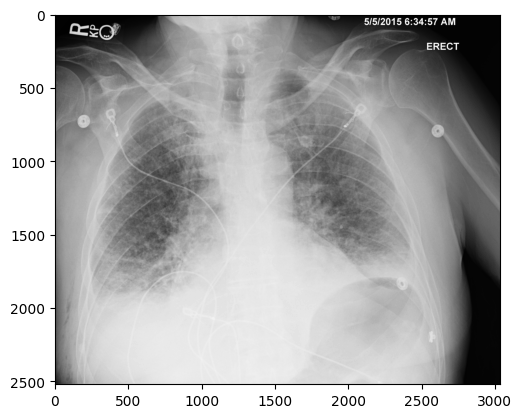

In [177]:
img = PIL.Image.open(metadf.iloc[index]['img_paths'])
plt.imshow(img, cmap = 'grey')
plt.show()

In [178]:
inputs = processor(images = img, return_tensors = 'pt')
print(inputs['pixel_values'].shape, inputs.keys())

torch.Size([1, 3, 224, 224]) dict_keys(['pixel_values'])


In [179]:
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.pooler_output

In [180]:
print(embeddings.shape)
print(text_embeddings.shape)

torch.Size([1, 768])


In [182]:
image_embeddings = embeddings.cuda()
print(image_embeddings.shape)
text_embeddings = text_embeddings.pooler_output

image_embeddings = F.normalize(image_embeddings, dim=-1)
text_embeddings = F.normalize(text_embeddings, dim=-1)

similarity = torch.matmul(image_embeddings, text_embeddings.T)
print(similarity)

In [80]:
similarities = np.array([torch.matmul(image_embeddings, text_embeddings[:,x,:].T).cpu().numpy()[0][0] for x in range(text_embeddings.shape[1])])
print(similarities.mean(), similarities.std(), similarities.min(), similarities.max())

-0.039881423 0.021425487 -0.098712005 0.0052503347


In [89]:
similarities = np.array([torch.matmul(image_embeddings, text_embeddings[:,x,:].T).cpu().numpy()[0][0] for x in range(text_embeddings.shape[1])])
print(similarities.mean(), similarities.std(), similarities.min(), similarities.max())

-0.042765256 0.01630415 -0.085035704 0.006972607
